<h1>Project description</h1>
The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

<h2>Interconnect's services</h2>

**Interconnect mainly provides two types of services:** <br>

1. Landline communication. The telephone can be connected to several lines simultaneously
<br><br>
2. Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable
<br>
**Some other services the company provides include:**
<br>
- Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
<br><br>
- A dedicated technical support line (TechSupport)
<br><br>
- Cloud file storage and data backup (OnlineBackup)
<br><br>
- TV streaming (StreamingTV) and a movie directory (StreamingMovies)
<br><br>
The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.


**Data Description:**

The data consists of files obtained from different sources:

- `contract.csv` - contract information


- `personal.csv` - the client's personal data


- `internet.csv` - information about Internet services


- `phone.csv` - information about telephone services


In each file, the column customerID contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#1">Download and prepare the data</a></li>
        <li><a href="#2">Data preparation</a></li>
        <li><a href="#3">EDA</a></li>
        <li><a href="#4">Model Training</a></li>
        <li><a href="#5">Solution Report</a></li>
    </ol>
</div>
<br>
<hr>

# <a id="1">Download and prepare the data</a>

In [1]:
!pip install -U imbalanced-learn

#loading ibraries
import pandas as pd 
import numpy as np
import time
from datetime import datetime
import math

#visualization & statistical
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# import modules 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler 
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,plot_roc_curve,roc_auc_score,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

# import warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
#load dataset
try:
    contract = pd.read_csv('contract.csv')
    internet = pd.read_csv('internet.csv')
    personal = pd.read_csv('personal.csv')
    phone = pd.read_csv('phone.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))  
        
# function to display general information about the dataset
def general_info(df):
    print
    print("\033[1m" + '-'*100 + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print('-'*100)
    print("\033[1m" + 'Head:')  
    display(df.head(5))
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail(5))
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Describe include all:')
    print()
    display(df.describe(include='all'))
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(df.isnull().sum())
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print('-'*100)
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print('-'*100)
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print('-'*100)
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()
    print('-'*100)

In [4]:
# information about our datasets 
print()
print()
print("\033[1m" + 'info about `contract` dataset')
general_info(contract)
print()
print()
print()
print("\033[1m" + 'info about `internet` dataset')
general_info(internet)
print()
print()
print("\033[1m" + 'info about `personal` dataset')
general_info(personal)
print()
print()
print("\033[1m" + 'info about `phone` dataset')
general_info(phone)
print()



info about `contract` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
customerID,object,7043,0,0.0
BeginDate,object,7043,0,0.0
EndDate,object,7043,0,0.0
Type,object,7043,0,0.0
PaperlessBilling,object,7043,0,0.0
PaymentMethod,object,7043,0,0.0
MonthlyCharges,float64,7043,0,0.0
TotalCharges,object,7043,0,0.0



----------------------------------------------------------------------------------------------------
Head:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



----------------------------------------------------------------------------------------------------

Tail:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


----------------------------------------------------------------------------------------------------

Describe:



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



----------------------------------------------------------------------------------------------------

Describe include all:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7590-VHVEG,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN



----------------------------------------------------------------------------------------------------

nulls in the columns:



customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

customerID 0
BeginDate 0
EndDate 0
Type 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 0


None


----------------------------------------------------------------------------------------------------

Shape: (7043, 8)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object


----------------------------------------------------------------------------------------------------



info about `internet` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
customerID,object,5517,0,0.0
InternetService,object,5517,0,0.0
OnlineSecurity,object,5517,0,0.0
OnlineBackup,object,5517,0,0.0
DeviceProtection,object,5517,0,0.0
TechSupport,object,5517,0,0.0
StreamingTV,object,5517,0,0.0
StreamingMovies,object,5517,0,0.0



----------------------------------------------------------------------------------------------------
Head:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



----------------------------------------------------------------------------------------------------

Tail:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


----------------------------------------------------------------------------------------------------

Describe:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



----------------------------------------------------------------------------------------------------

Describe include all:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



----------------------------------------------------------------------------------------------------

nulls in the columns:



customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

customerID 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0


None


----------------------------------------------------------------------------------------------------

Shape: (5517, 8)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object


----------------------------------------------------------------------------------------------------


info about `personal` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
customerID,object,7043,0,0.0
gender,object,7043,0,0.0
SeniorCitizen,int64,7043,0,0.0
Partner,object,7043,0,0.0
Dependents,object,7043,0,0.0



----------------------------------------------------------------------------------------------------
Head:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



----------------------------------------------------------------------------------------------------

Tail:


,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


----------------------------------------------------------------------------------------------------

Describe:



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



----------------------------------------------------------------------------------------------------

Describe include all:



,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7590-VHVEG,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN



----------------------------------------------------------------------------------------------------

nulls in the columns:



customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

customerID 0
gender 0
SeniorCitizen 5901
Partner 0
Dependents 0


None


----------------------------------------------------------------------------------------------------

Shape: (7043, 5)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object


----------------------------------------------------------------------------------------------------


info about `phone` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
customerID,object,6361,0,0.0
MultipleLines,object,6361,0,0.0



----------------------------------------------------------------------------------------------------
Head:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



----------------------------------------------------------------------------------------------------

Tail:


,customerID,MultipleLines
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes
6360,3186-AJIEK,No



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None


----------------------------------------------------------------------------------------------------

Describe:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390



----------------------------------------------------------------------------------------------------

Describe include all:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390



----------------------------------------------------------------------------------------------------

nulls in the columns:



customerID       0
MultipleLines    0
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

customerID 0
MultipleLines 0


None


----------------------------------------------------------------------------------------------------

Shape: (6361, 2)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


customerID       object
MultipleLines    object
dtype: object


----------------------------------------------------------------------------------------------------



## first look after loading our four datasets:

<b style="font-size: 17px;">The `contract` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 7043 | 8 columns</b>

`customerID` - unique user identifier

`BeginDate` - when our customer start using our services

`EndDate`- when our customer end using our services

`Type` - payment plan (our customers prefer Month-to-month)	

`PaperlessBilling` - How our customers get there monthly bill (our customers prefer digital invoice)

`PaymentMethod` - the way our customers pay us (our customers prefer Electronic check) 

`MonthlyCharges` - total invoice bill amount monthly (min 18.25 to max of 118.75 when our mean is 64.76)

`TotalCharges` - how much they pay since they start using our service 

- No missing values

- No duplicates

- Need dtypes changes in `BeginDate` to `datetime` instead of `object` and `TotalCharges` to `float` instead of `object`

<br>

<b style="font-size: 17px;">The `personal` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 7043 | 5 columns</b>

`customerID` - unique user identifier

`gender` - Our Customer gender Male or female (we have more Males)

`SeniorCitizen`- Older customer relatively advanced age 0 or 1 (we only have one in our data)

`Partner ` -  If our customer in any kind of relationship Yes or no 

`Dependents` - Relying on or requiring the aid or support of other person Yes or No 

- No missing values

- No duplicates

- No dtypes changes needed

<br>

<b style="font-size: 17px;">The `internet` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 5517 | 8 columns</b>

`customerID` - unique user identifier

`InternetService` - Which type of connection (Dsl, Fiber etc') , (our customers prefer Fiber optic)

`OnlineSecurity`- Customer use Yes or No this service , (our customers prefer not to connect to this service) 

`OnlineBackup ` - Customer use Yes or No this service, (our customers prefer not to connect to this service) 

`DeviceProtection` - Customer use Yes or No this service, (our customers prefer not to connect to this service)

`TechSupport ` - Customer use Yes or No this service , (our customers prefer not to connect to this service)

`StreamingTV` - Customer use Yes or No this service, (our customers prefer not to connect to this service)

`StreamingMovies` - Customer use Yes or No this service, (our customers prefer not to connect to this service)

- No missing values

- No duplicates

- No dtypes changes needed


<br>


<b style="font-size: 17px;">The `phone` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 6361 | 2 columns</b>

`customerID` - unique user identifier

`MultipleLines` - Customer how connect to more than one phone line Yes or No

- No missing values

- No duplicates

- No dtypes changes needed

<br>

<hr>
**Conclusion**

- Four datasets `contract` , `personal`, `internet` , `phone` 


- Two dtypes issues that need to be fix in `contract` dataset:

  
  - `BeginDate` change from `object` to `datetime`
  
  
  - `TotalCharges` change from `object` to `float`

- No duplicates


- No missing values? at this stage correct, But this will be change after we will merge our four datasets into one

<hr>

# <a id="2">Data preparation</a>

- Merge our four datasets into one and lowercase our columns names to make it uniform 
       
- Fill the missing values , cause by the differences terms of changes:
 
   - lower number of rows in `internet` & `phone` compere to `contract` & `personal` 

- Change the dtypes of the columns `BeginDate` from `object` to `datetime` & `TotalCharges` from `object` to `float`
    
- We need to change our Yes/No Columns answer to 0/1 
    
  - `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`,`streamingtv` and `streamingmovies` , `personal` , `Dependents`

  - `enddate` also going to be change to 0/1 since we have dates of customers that been end our services and other that still used our service and mark as 'No' in the row value
  
  -`gender` will also change from female/male into 0/1
  
- We also going to add new columns like `churn`, `services`, `subscribe` , `end` that show the current date if the customer is still use our service to we can calc the time our customer with us after this data was export


## Merge our 4 datasets into 1

In [5]:
#Merge our four datasets into one
df = (personal.merge(contract,how="left",on="customerID").merge(phone,how="left",on="customerID").merge(internet,how="left",
                                                                                                     on="customerID"))

In [6]:
#lowercase our columns name
df.columns = df.columns.str.lower()

In [7]:
#info about our new merge dataset 'telecom_services'
print("\033[1m" + 'info about `df` dataset')
general_info(df)

info about `df` dataset
----------------------------------------------------------------------------------------------------


,type,count,na,na%
customerid,object,7043,0,0.000000
gender,object,7043,0,0.000000
seniorcitizen,int64,7043,0,0.000000
partner,object,7043,0,0.000000
dependents,object,7043,0,0.000000
begindate,object,7043,0,0.000000
enddate,object,7043,0,0.000000
type,object,7043,0,0.000000
paperlessbilling,object,7043,0,0.000000
paymentmethod,object,7043,0,0.000000



----------------------------------------------------------------------------------------------------
Head:


,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No



----------------------------------------------------------------------------------------------------

Tail:


,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
7038,6840-RESVB,Male,0,Yes,Yes,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaN,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Male,1,Yes,No,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Fiber optic,No,No,No,No,No,No
7042,3186-AJIEK,Male,0,No,No,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes



----------------------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   begindate         7043 non-null   object 
 6   enddate           7043 non-null   object 
 7   type              7043 non-null   object 
 8   paperlessbilling  7043 non-null   object 
 9   paymentmethod     7043 non-null   object 
 10  monthlycharges    7043 non-null   float64
 11  totalcharges      7043 non-null   object 
 12  multiplelines     6361 non-null   object 
 13  internetservice   5517 non-null   object 
 14  onlinesecurity    5517 non

None


----------------------------------------------------------------------------------------------------

Describe:



,seniorcitizen,monthlycharges
count,7043.000000,7043.000000
mean,0.162147,64.761692
std,0.368612,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,0.000000,70.350000
75%,0.000000,89.850000
max,1.000000,118.750000



----------------------------------------------------------------------------------------------------

Describe include all:



,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
count,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,6361,5517,5517,5517,5517,5517,5517,5517
unique,7043,2,NaN,2,2,77,5,3,2,4,NaN,6531,2,2,2,2,2,2,2,2
top,7590-VHVEG,Male,NaN,No,No,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,,No,Fiber optic,No,No,No,No,No,No
freq,1,3555,NaN,3641,4933,366,5174,3875,4171,2365,NaN,11,3390,3096,3498,3088,3095,3473,2810,2785
mean,NaN,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



----------------------------------------------------------------------------------------------------

nulls in the columns:



customerid             0
gender                 0
seniorcitizen          0
partner                0
dependents             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
multiplelines        682
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
dtype: int64


----------------------------------------------------------------------------------------------------

Zeros in the columns:

customerid 0
gender 0
seniorcitizen 5901
partner 0
dependents 0
begindate 0
enddate 0
type 0
paperlessbilling 0
paymentmethod 0
monthlycharges 0
totalcharges 0
multiplelines 0
internetservice 0
onlinesecurity 0
onlinebackup 0
deviceprotection 0
techsupport 0
streamingtv 0
streamingmovies 0


None


----------------------------------------------------------------------------------------------------

Shape: (7043, 20)

----------------------------------------------------------------------------------------------------

Duplicated: We have 0 duplicated rows

----------------------------------------------------------------------------------------------------

Dtypes:


customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
begindate            object
enddate              object
type                 object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
dtype: object


----------------------------------------------------------------------------------------------------


In [8]:
#check for missing values
df.isna().sum()

customerid             0
gender                 0
seniorcitizen          0
partner                0
dependents             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
multiplelines        682
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
dtype: int64

In [9]:
#filled our missing values with the value 'No'
for col in ["onlinesecurity","onlinebackup","deviceprotection","techsupport","streamingtv","streamingmovies","multiplelines"]:
    df[col] = df[col].fillna("No")

In [10]:
df["internetservice"] = df["internetservice"].fillna("Uknown")

In [11]:
#after filling the missing values check for missing values
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
dtype: int64

In [12]:
#Convert 'begindate' to datetime dtype
df['begindate'] = pd.to_datetime(df['begindate'])

In [13]:
list_value = []
for value in df.enddate:
    if value != 'No':
        datetime_value = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
        list_value.append(datetime_value)
    else:
        list_value.append(datetime.now())

In [14]:
df.insert(7,'end', pd.to_datetime(list_value))

In [15]:
# convert 'totalcharges' column to numeric
df['totalcharges'] = df['totalcharges'].apply(pd.to_numeric,errors='coerce')

In [16]:
#check if there is any missing values after convertion the columns above
df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
begindate            0
enddate              0
end                  0
type                 0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
dtype: int64

In [17]:
#let's see how the dataset looks now 
df[df["begindate"]=="2020-02-01"]

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,end,type,paperlessbilling,...,monthlycharges,totalcharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.691919,Two year,Yes,...,52.55,NaN,No,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,No,2022-10-06 20:59:52.693947,Two year,No,...,20.25,NaN,No,Uknown,No,No,No,No,No,No
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.695463,Two year,No,...,80.85,NaN,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.696977,Two year,No,...,25.75,NaN,Yes,Uknown,No,No,No,No,No,No
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.698995,Two year,No,...,56.05,NaN,No,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.716264,Two year,No,...,19.85,NaN,No,Uknown,No,No,No,No,No,No
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.720341,Two year,No,...,25.35,NaN,Yes,Uknown,No,No,No,No,No,No
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.724978,Two year,No,...,20.00,NaN,No,Uknown,No,No,No,No,No,No
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.731739,One year,Yes,...,19.70,NaN,No,Uknown,No,No,No,No,No,No
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.744652,Two year,No,...,73.35,NaN,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [18]:
#Fill missing values of totalcharges' with monthlycharges 
df['totalcharges'] = df['totalcharges'].combine_first(df.monthlycharges)

In [19]:
# Determine any null values after convertion
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
begindate           0
enddate             0
end                 0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   seniorcitizen     7043 non-null   int64         
 3   partner           7043 non-null   object        
 4   dependents        7043 non-null   object        
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   object        
 7   end               7043 non-null   datetime64[ns]
 8   type              7043 non-null   object        
 9   paperlessbilling  7043 non-null   object        
 10  paymentmethod     7043 non-null   object        
 11  monthlycharges    7043 non-null   float64       
 12  totalcharges      7043 non-null   float64       
 13  multiplelines     7043 non-null   object        
 14  internetservice   7043 n

In [21]:
#let's see how the dataset looks now 
df[df["begindate"]=="2020-02-01"]

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,end,type,paperlessbilling,...,monthlycharges,totalcharges,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.691919,Two year,Yes,...,52.55,52.55,No,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,No,2022-10-06 20:59:52.693947,Two year,No,...,20.25,20.25,No,Uknown,No,No,No,No,No,No
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.695463,Two year,No,...,80.85,80.85,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.696977,Two year,No,...,25.75,25.75,Yes,Uknown,No,No,No,No,No,No
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.698995,Two year,No,...,56.05,56.05,No,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.716264,Two year,No,...,19.85,19.85,No,Uknown,No,No,No,No,No,No
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.720341,Two year,No,...,25.35,25.35,Yes,Uknown,No,No,No,No,No,No
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.724978,Two year,No,...,20.00,20.00,No,Uknown,No,No,No,No,No,No
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.731739,One year,Yes,...,19.70,19.70,No,Uknown,No,No,No,No,No,No
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,No,2022-10-06 20:59:52.744652,Two year,No,...,73.35,73.35,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [22]:
#change the values in 'enddate' from No/Date to numeric ones
df['enddate'] = df['enddate'].map(lambda x: 0 if x=='No' else 1)

In [23]:
#change the values in 'gender' from male/Female to numeric ones_
df['gender'] = df['gender'].map(lambda x: 1 if x =='Female' else 0)

In [24]:
# Extract the Year, Month and Day from beginDate
df["churn"] = (df["enddate"]!=0).astype("int")
df['day'] = df['begindate'].dt.day
df['month'] = df['begindate'].dt.month
df['year'] = df['begindate'].dt.year
df['subscribe'] = df['end'].dt.year - df['begindate'].dt.year
df['services'] = [x.count('Yes') for x in zip(df['onlinesecurity'], 
                                              df['onlinebackup'], df['deviceprotection'], 
                                              df['techsupport'], df['streamingtv'], 
                                              df['streamingmovies'])]

In [25]:
# replace the No/Yes values with numerical 0/1
df = (df.replace(to_replace='No',value=0).replace(to_replace='Yes',value=1))

<hr>

- change to 0/1 the columns with Yes/No answers and also `enddate` since it's mix of date and No and change `gender` into 0/1 as well


- Create a new column `churn`, 0/1 for Yes or no `churn` customer


- Create a new column `subscribe` to see how many months the customer with us


- Create a new column `services` to see how many services we offer our customer use 


- split our dates into day/month/year

- we fill the missing amount in `totalcharges` with combine `monthlycharge` 

In [26]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,end,type,paperlessbilling,...,deviceprotection,techsupport,streamingtv,streamingmovies,churn,day,month,year,subscribe,services
0,7590-VHVEG,1,0,1,0,2020-01-01,0,2022-10-06 20:59:52.686342,Month-to-month,1,...,0,0,0,0,0,1,1,2020,2,1
1,5575-GNVDE,0,0,0,0,2017-04-01,0,2022-10-06 20:59:52.686342,One year,0,...,1,0,0,0,0,1,4,2017,5,2
2,3668-QPYBK,0,0,0,0,2019-10-01,1,2019-12-01 00:00:00.000000,Month-to-month,1,...,0,0,0,0,1,1,10,2019,0,2
3,7795-CFOCW,0,0,0,0,2016-05-01,0,2022-10-06 20:59:52.687864,One year,0,...,1,1,0,0,0,1,5,2016,6,3
4,9237-HQITU,1,0,0,0,2019-09-01,1,2019-11-01 00:00:00.000000,Month-to-month,1,...,0,0,0,0,1,1,9,2019,0,0


In [27]:
print()
print("\033[1m" + '`multiplelines`' + "\033[0m")
print(df.multiplelines.value_counts())
print()
print("\033[1m" + '`internetservice`' + "\033[0m")
print(df.internetservice.value_counts())
print()
print("\033[1m" + '`paperlessbilling`' + "\033[0m")
print(df.paperlessbilling.value_counts())
print()
print("\033[1m" + '`paymentmethod`' + "\033[0m")
print(df.paymentmethod.value_counts())
print()
print("\033[1m" + '`gender`' + "\033[0m")
print(df.gender.value_counts())


`multiplelines`
0    4072
1    2971
Name: multiplelines, dtype: int64

`internetservice`
Fiber optic    3096
DSL            2421
Uknown         1526
Name: internetservice, dtype: int64

`paperlessbilling`
1    4171
0    2872
Name: paperlessbilling, dtype: int64

`paymentmethod`
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: paymentmethod, dtype: int64

`gender`
0    3555
1    3488
Name: gender, dtype: int64


<hr>

In [28]:
#final check if there is any missing values we may miss
df.isnull().sum()/df.shape[0]

customerid          0.0
gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
begindate           0.0
enddate             0.0
end                 0.0
type                0.0
paperlessbilling    0.0
paymentmethod       0.0
monthlycharges      0.0
totalcharges        0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
churn               0.0
day                 0.0
month               0.0
year                0.0
subscribe           0.0
services            0.0
dtype: float64

<hr>

**Conclusion**

What we done in this stage 

- Merge our four datasets into one and lowercase our columns names to make it uniform 
       
- Fill the missing values , cause by the differences terms of changes:

 
   - lower number of rows in `internet` & `phone` compere to `contract` & `personal` 
   

- Change the dtypes of the columns `BeginDate` from `object` to `datetime` & `TotalCharges` from `object` to `float`

    
- We need to change our Yes/No Columns answer to 0/1 

- `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`,`streamingtv` and `streamingmovies` , `personal` , `Dependents`
  

- `enddate` also going to be change to 0/1 since we have dates of customers that been end our services and other that still used our service and mark as 'No' in the row value
  
  
- `gender` will also change from female/male into 0/1
  
 
- We also going to add new columns like `churn`, `services`, `subscribe` , `end` that show the current date if the customer is still use our service to we can calc the time our customer with us after this data was export


- change to 0/1 the columns with Yes/No answers and also `enddate` since it's mix of date and No and change `gender` into 0/1 as well


- Create a new column `churn`, 0/1 for Yes or no `churn` customer



- Create a new column `subscribe` to see how many months the customer with us



- Create a new column `services` to see how many services we offer our customer use 



- split our dates into day/month/year



- we fill the missing amount in `totalcharges` with combine `monthlycharge` 



**Now our data ready for the next stage EDA**

<hr>

# <a id="3">EDA</a>
    
- Analysis our data more deep using visualization our data in different terms 

    
- Visualization what type of subscribers `churn` in terms of: `internetservice` , `Type` ,  `monthlycharges`


- See if there is any affect depend on what customers subscription

    
- Check if there is outliers in our data

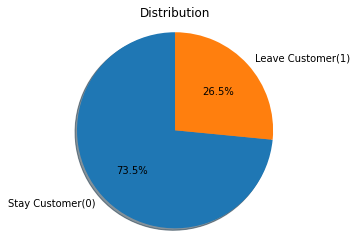

In [29]:
# Get the distribution count for each group
retained, lost = df.enddate.value_counts()
#plot distribution on a pie chart
plt.pie([retained, lost],labels=['Stay Customer(0)','Leave Customer(1)'],
        autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Distribution')
plt.axis('equal')
plt.show();

As we can see less than 30% leave our company services , it's very good news 

In [30]:
#Plot differents columns to learn more deep our data
plot_df = df[['monthlycharges','churn','services','subscribe','year','seniorcitizen','totalcharges']].copy()

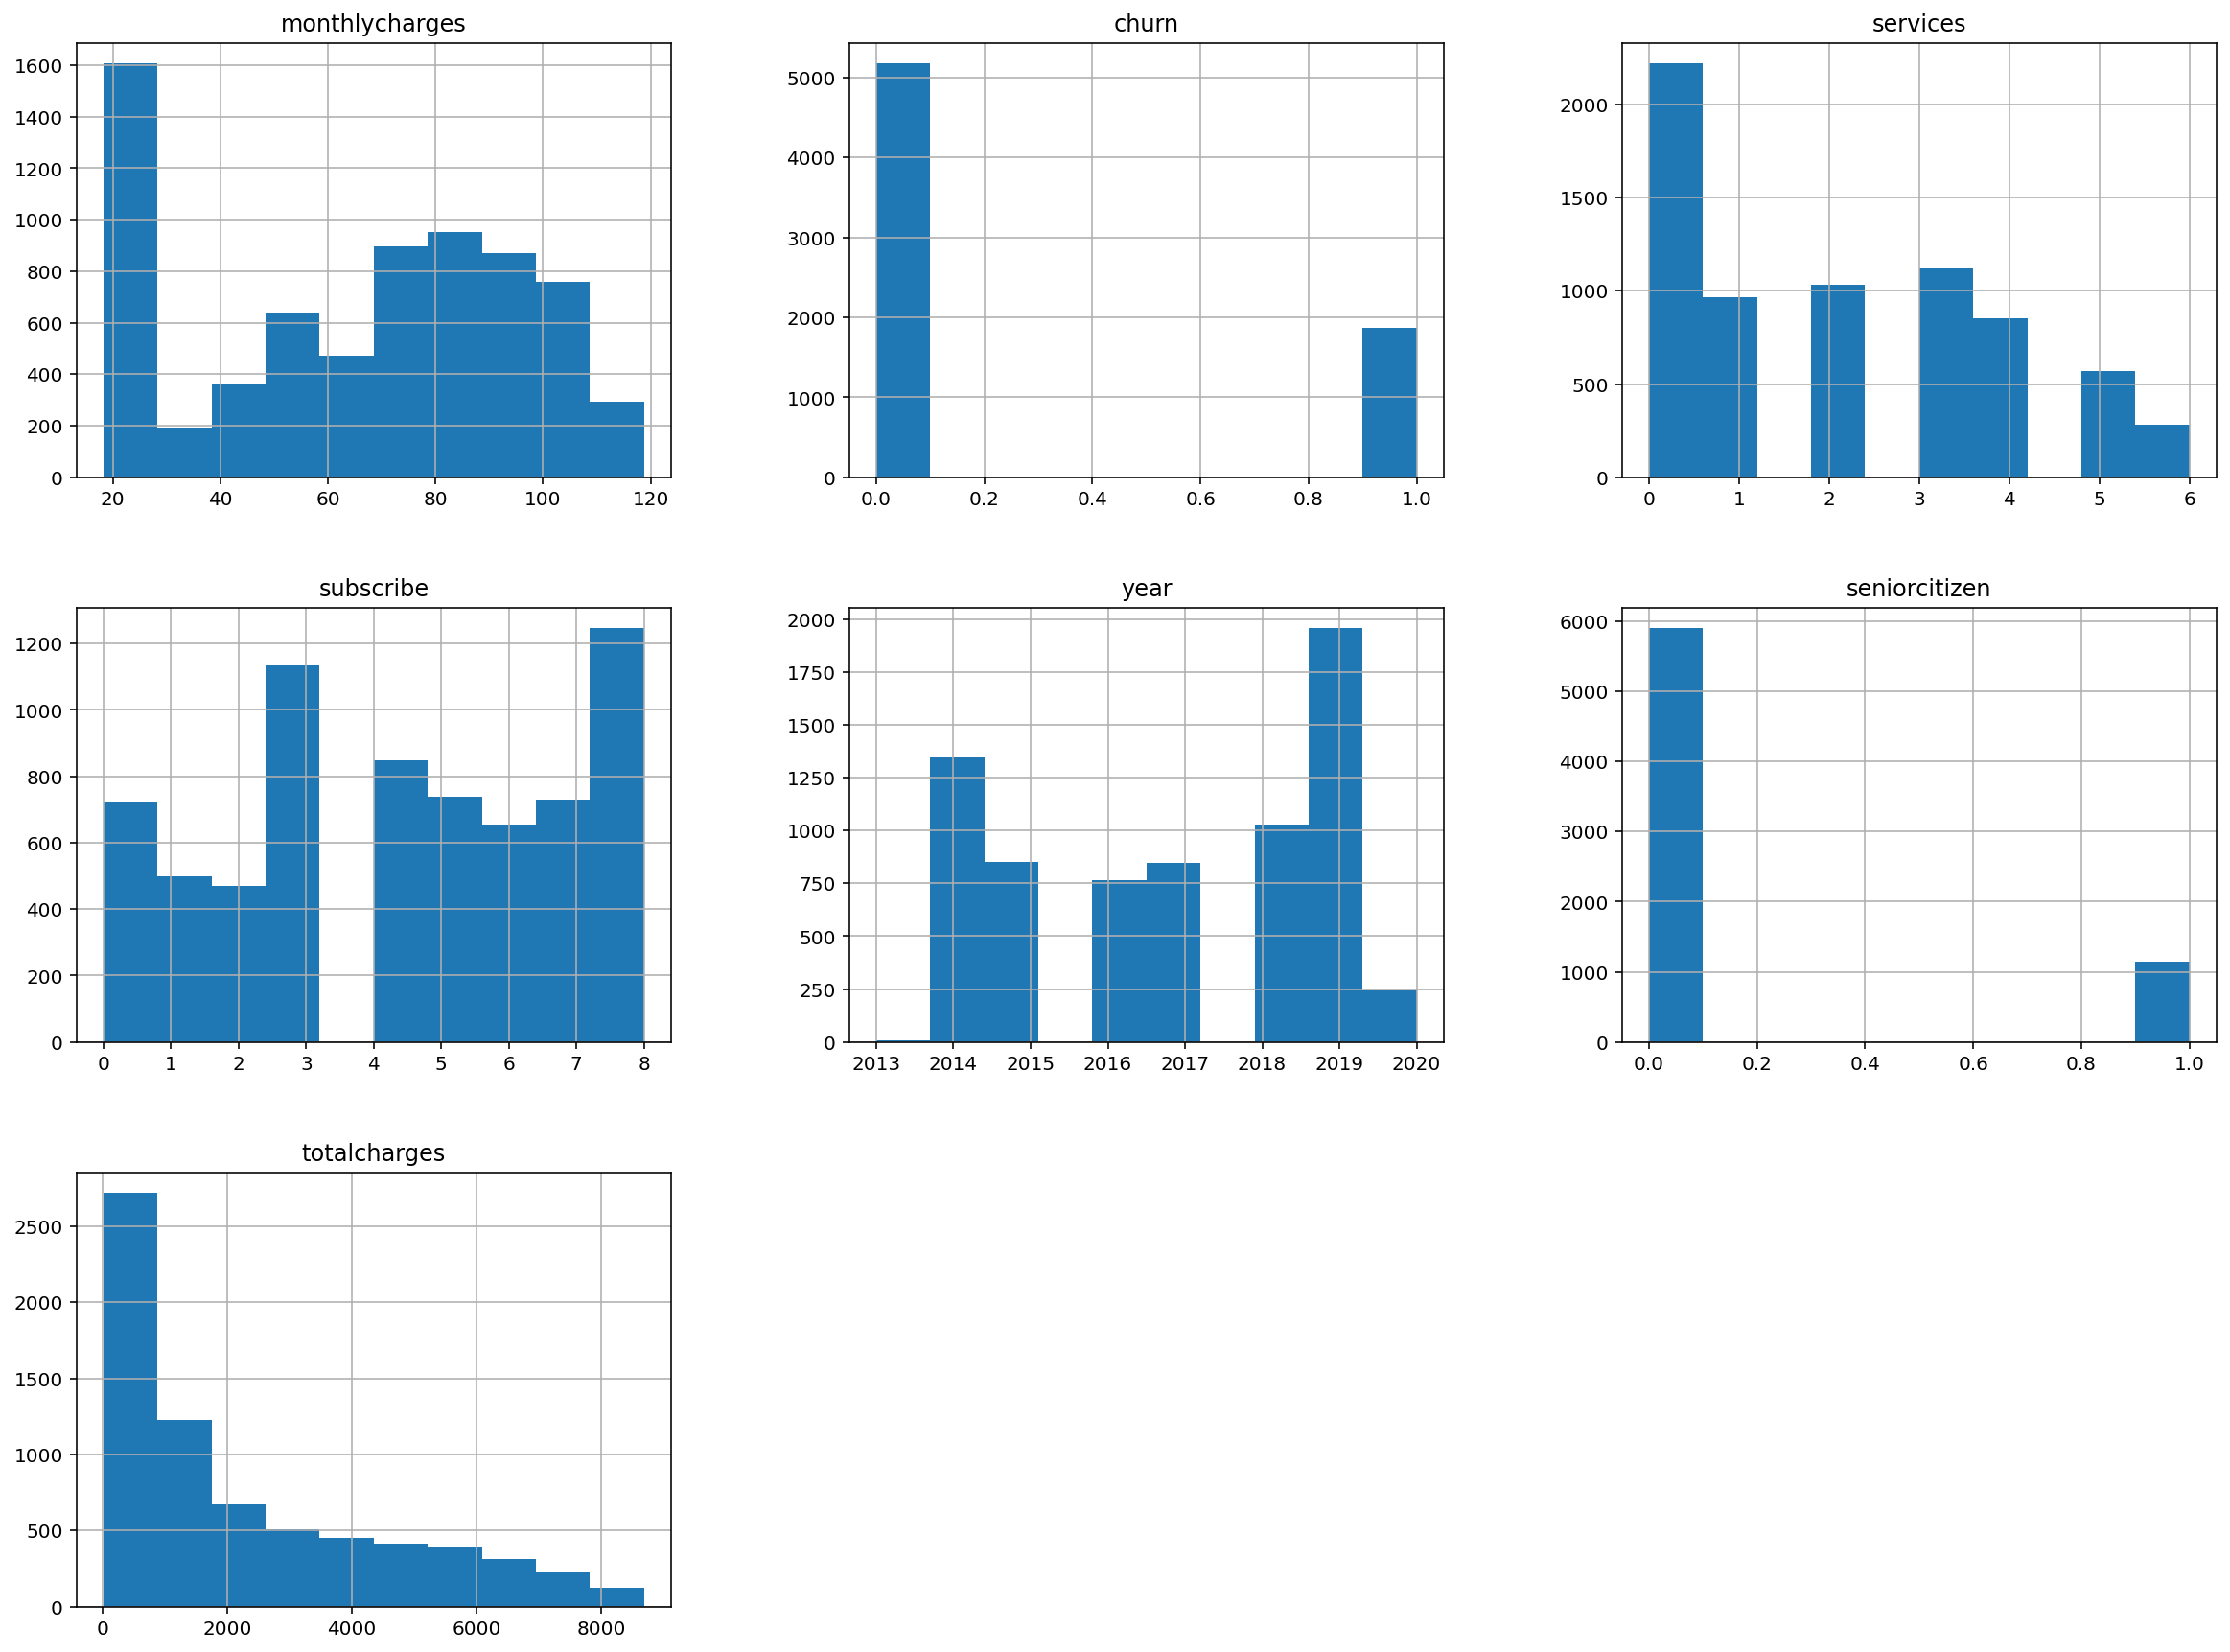

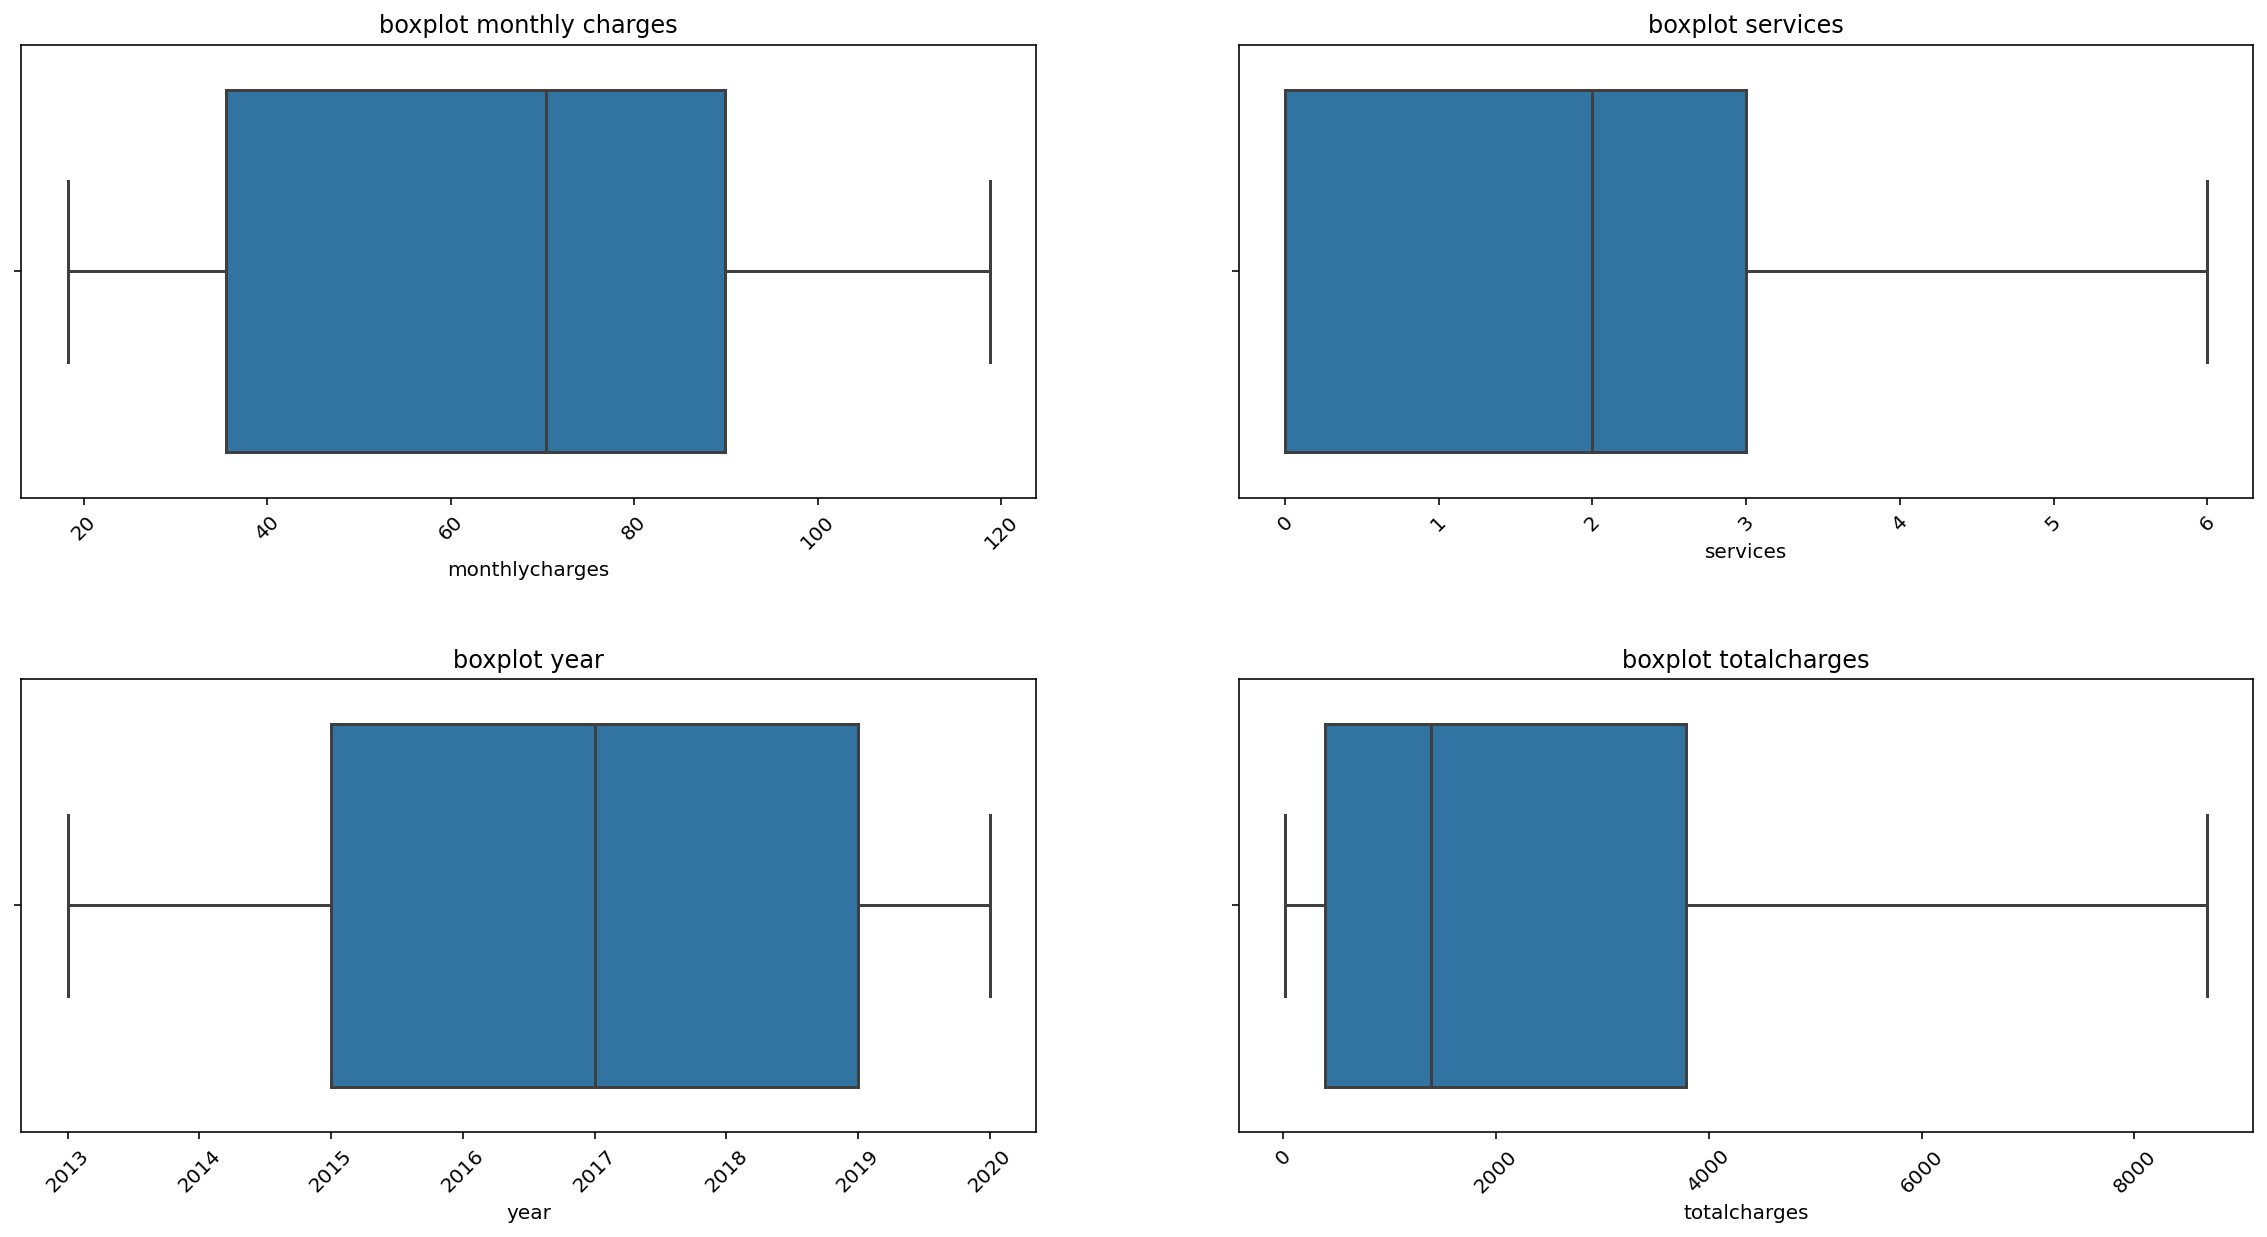

In [31]:
print()

def plot(df):
    df = df
    temp_raw_data= plot_df
    fig = plt.figure(figsize=(20,15), dpi=144)
    fig.subplots_adjust(hspace=0.4)
    ax = fig.gca()
    temp_raw_data.hist(ax = ax)
    fig = ax.get_figure()
    
plot(df)

fig = plt.figure(figsize=(20,10), dpi=144)
fig.subplots_adjust(hspace=0.4)

#plot of 'monthly charges' column
ax1 = plt.subplot(2,2,1)
ax1 = sns.boxplot(data=df, x="monthlycharges" , hue='enddate')
ax1 = plt.title('boxplot monthly charges')
plt.xticks(rotation=45)

#plot of 'year' column
ax2 = plt.subplot(2,2,2)
ax2 = sns.boxplot(data=df, x="services" , hue='enddate')
ax2 = plt.title('boxplot services')
plt.xticks(rotation=45)

#plot of 'year' column
ax3 = plt.subplot(2,2,3)
ax3 = sns.boxplot(data=df, x="year" , hue='enddate')
ax3 = plt.title('boxplot year')
plt.xticks(rotation=45)

#plot of 'year' column
ax4 = plt.subplot(2,2,4)
ax4 = sns.boxplot(data=df, x="totalcharges" , hue='enddate')
ax4 = plt.title('boxplot totalcharges')
plt.xticks(rotation=45)

plt.show();

**Conclusion**

- `monthlycharges` , we can see that there is two picks in our plot between 70-80 and between 80-100 , means that most our our customers pay around 70-100 per month


- from the `seniorcitizen`plot we can see that most of our customers are young people 


- the class imbalance is not too high 


- Our customers prefer longer `subscription`, since the highest pick in the short time is 3 years and max of at least 8 years 


- we can see that most of our customers still with us after this dataset been export in feb 2020

**Looking for corr between features and target**

Scatter matrix monthly charges x total charges x churn x subscribe x year


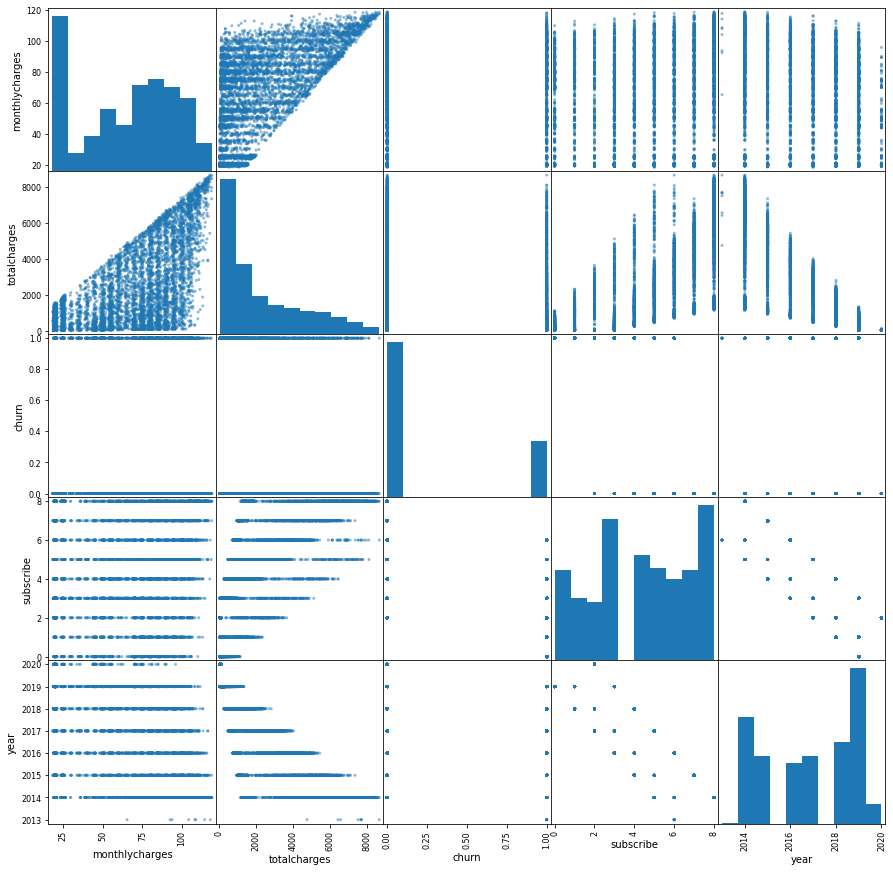

In [32]:
scatter_df = df[['monthlycharges','totalcharges','churn','subscribe','year']].copy()
print('Scatter matrix monthly charges x total charges x churn x subscribe x year')
pd.plotting.scatter_matrix(scatter_df, figsize=(15, 15))
plt.show();

Scatter matrix senior citizen x subscribe x services x churn


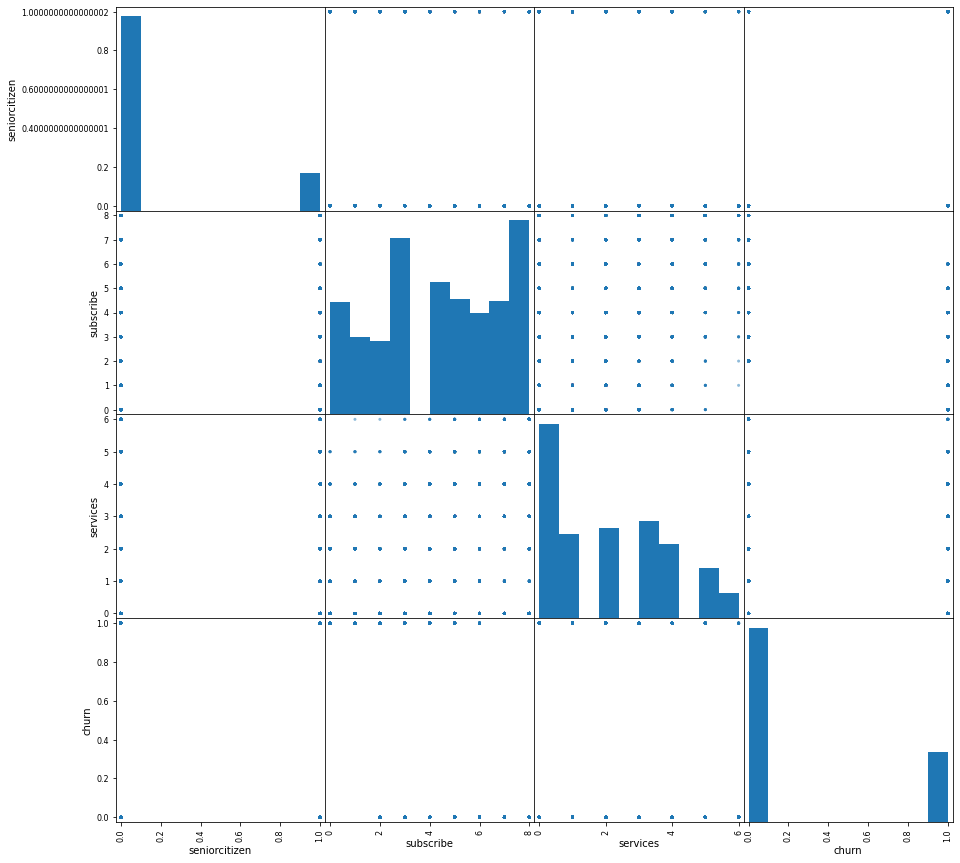

In [33]:
scatter_df2 = df[['seniorcitizen','subscribe','services','churn']].copy()
print('Scatter matrix senior citizen x subscribe x services x churn')
pd.plotting.scatter_matrix(scatter_df2, figsize=(15, 15))
plt.show();

Scatter matrix x subscribe x services x churn


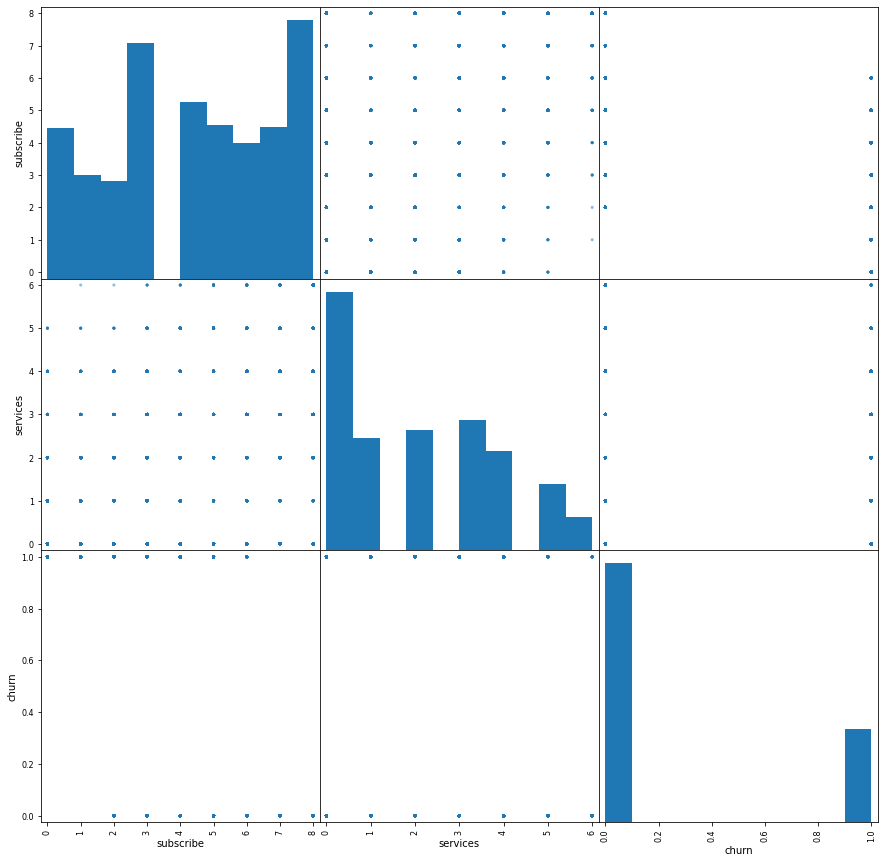

In [34]:
scatter_df3 = df[['subscribe','services','churn']].copy()
print('Scatter matrix x subscribe x services x churn')
pd.plotting.scatter_matrix(scatter_df3, figsize=(15, 15))
plt.show();

Scatter matrix year x subscribe x services x churn


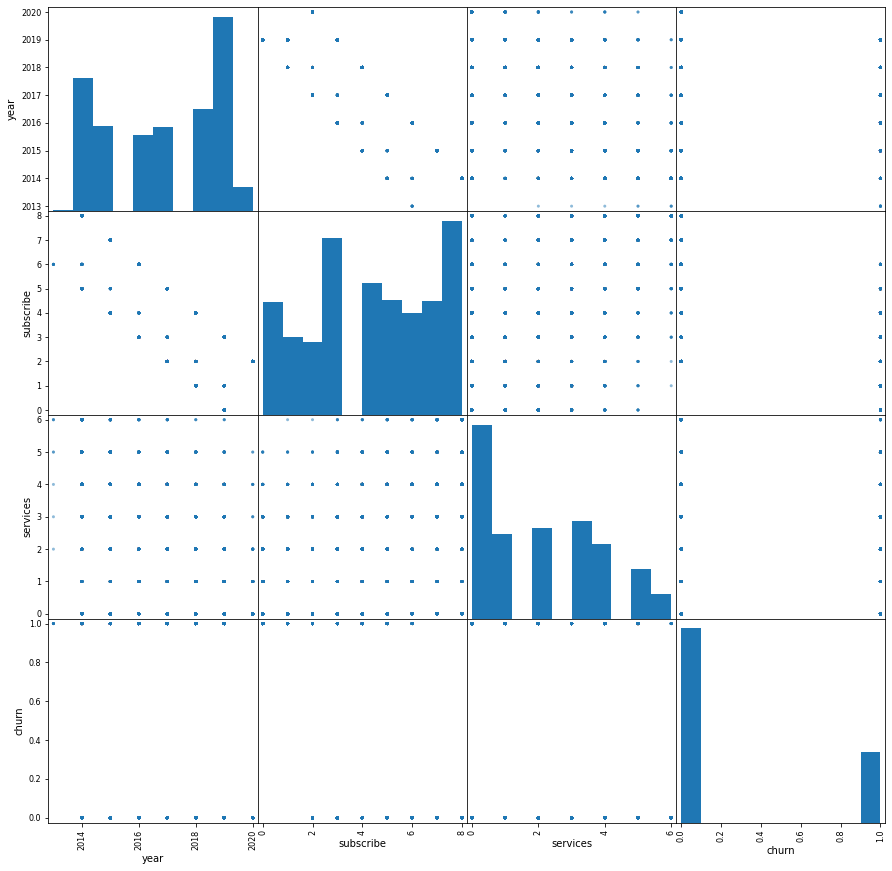

In [35]:
scatter_df4 = df[['year','subscribe','services','churn']].copy()
print('Scatter matrix year x subscribe x services x churn')
pd.plotting.scatter_matrix(scatter_df4, figsize=(15, 15))
plt.show();

**Correlation matrix between different variables**

In [36]:
matrix_df = df[['seniorcitizen','monthlycharges','totalcharges','year','services','churn','subscribe']].copy()

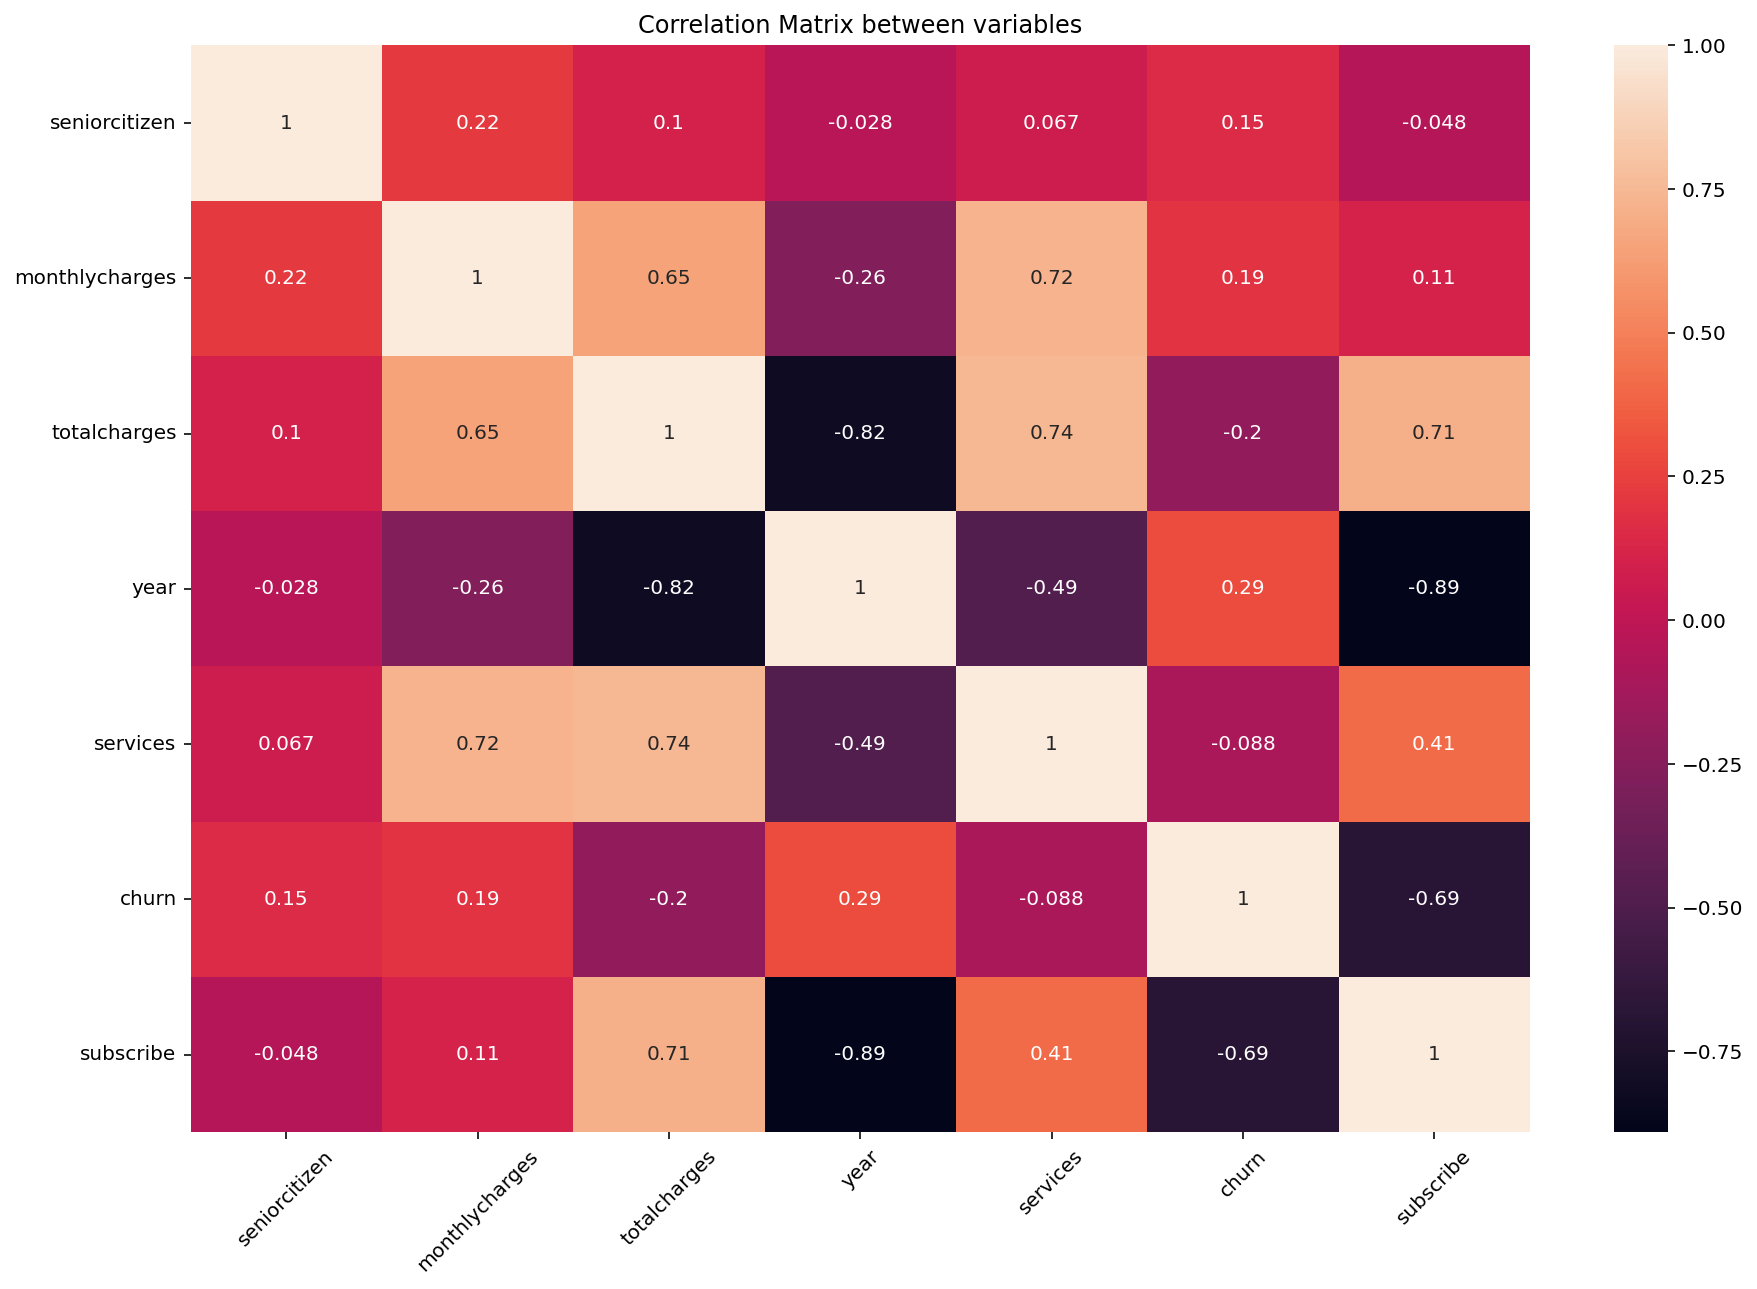

In [37]:
plt.figure(figsize=(15,10), dpi=144)
corrMatrix = matrix_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix between variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show();

**Conclusion**

We can see some features that positive correlated

- `services` & `monthlycharges`     0.72% correlated 

- `services` & `totalcharges`       0.74% correlated 

- `subscribe` & `totalcharges`      0.71% correlated

We can see some features that negative correlated

- `subscribe` & `year`   0.89% correlated

- `churn` & `subscribe`  0.69% correlated 

- `churn` & `totalcharges` 0.2% correlated

**hexagon plot correlation between totalcharges/monthlycharges/subscription & churn**

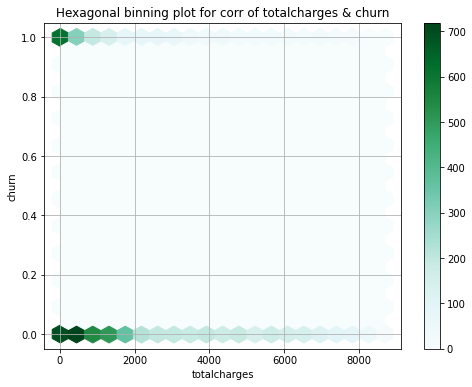

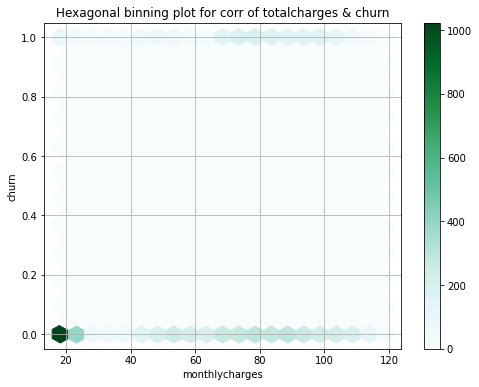

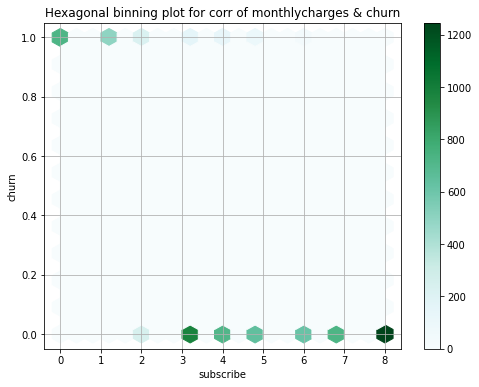

In [38]:
df.plot(x='totalcharges', y='churn', title = 'Hexagonal binning plot for corr of totalcharges & churn', 
                      kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

df.plot(x='monthlycharges', y='churn', title = 'Hexagonal binning plot for corr of totalcharges & churn', 
                      kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

df.plot(x='subscribe', y='churn', title = 'Hexagonal binning plot for corr of monthlycharges & churn', 
        kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

We can see that from our three hexagon plot correlation above there is:

- Strong negative relationship between `churn` and `subscription`, this show that can newer customers not `churn`

- Also we can see that customer that pay low bills every months are less likely be `churn`

<hr>In order to draw analytical statements about our dataset distribution we need to get some answers to our question:

- What is the most payment method used by our customers?


- How we classify our customers based on there payment method ?


- What features influence our `totalcharges`(`type` / `gender`) ?

**What `type` our customers prefer and what `paymentmethod `?**

In [39]:
## unique payment type
paymentype = (df['type'].value_counts() / df['type'].value_counts().sum() * 100).tolist()   

payment_type = df['type'].value_counts().reset_index().rename(columns={'index': 'Type', 'Type': 'count'})
payment_type['percentage (%)'] = ['{:.2f}'.format(x) for x in paymentype]
payment_type

,Type,type,percentage (%)
0,Month-to-month,3875,55.02
1,Two year,1695,24.07
2,One year,1473,20.91


In [40]:
## unique payment method
paymentmethod = (df['paymentmethod'].value_counts() / df['paymentmethod'].value_counts().sum() * 100).tolist()   

payment_method = df['paymentmethod'].value_counts().reset_index().rename(columns={'index': 'PaymentMethod', 
                                                                                                'PaymentMethod': 'count'})
payment_method['percentage (%)'] = ['{:.2f}'.format(x) for x in paymentmethod]
payment_method

,PaymentMethod,paymentmethod,percentage (%)
0,Electronic check,2365,33.58
1,Mailed check,1612,22.89
2,Bank transfer (automatic),1544,21.92
3,Credit card (automatic),1522,21.61


In [41]:
paymentmethod_tcharges = df.groupby('paymentmethod',as_index=False).agg({'totalcharges': 'sum'}).sort_values\
(by='totalcharges', ascending=False)
paymentmethod_tcharges

,paymentmethod,totalcharges
2,Electronic check,4944903.25
0,Bank transfer (automatic),4748394.35
1,Credit card (automatic),4671649.40
3,Mailed check,1691677.30


In [42]:
gender_tcharges = df.groupby('gender', as_index=False).agg({'totalcharges': 'sum'}).sort_values(by='totalcharges', 
                                                                                                ascending=False)
gender_tcharges['(%)'] = gender_tcharges['totalcharges'] / sum(gender_tcharges['totalcharges']) * 100
gender_tcharges

,gender,totalcharges,(%)
0,0,8103987.3,50.471302
1,1,7952637.0,49.528698


<hr>

**Conclusion**

- We can found that less than 30% leave our company services , it's very good news 


- `monthlycharges` , we can see that there is two picks in our plot between 70-80 and between 80-100 , means that most our our customers pay around 70-100 per month


- from the `seniorcitizen`plot we can see that most of our customers are young people 


- the class imbalance is not too high 


- Our customers prefer longer `subscription`, since the highest pick in the short time is 3 years and max of at least 8 years 


- Most of our customers still with us after this dataset been export in feb 2020


- Found some pos correlation :

  - `services` & `monthlycharges`     0.72% correlated 
  

  - `services` & `totalcharges`       0.74% correlated 
  

  - `subscribe` & `totalcharges`      0.71% correlated
  
  
- Some neg correlation :


  - `subscribe` & `year`   0.89% correlated
  

  - `churn` & `subscribe`  0.69% correlated 
  

  - `churn` & `totalcharges` 0.2% correlated
  
  

- Strong negative relationship between `churn` and `subscription`, this show that can newer customers not `churn`


- Also we can see that customer that pay low bills every months are less likely be `churn`


- Our customers prefer month to month payment that prepaid for one year or more with Electronic check and it's 50:50 between male and females

**Now we ready for the next stage Model Training**

<hr>

# <a id="4">Model Training</a>
    
- Drop the columns we don't need in our final dataset
    
- Check our final data correlation
    
- Encoding Categorical columns to numeric
    
- Target feature: the `'enddate'` column equals `'No' or as in our case 0
    
- split our data into train/test/valid
    
- using StandardScaler for data Standardization
   
- use balance in our models
    
- hyperparameter
    
- test our Final model
    
- Sampling
    
- Downsampling
    
- UpSampling
    
<hr>

In [43]:
# Drop the customerID and beginDate
df_final = df.drop(['customerid','begindate','churn','subscribe','end'], axis=1)

In [44]:
df_final.head()

,gender,seniorcitizen,partner,dependents,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,...,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,day,month,year,services
0,1,0,1,0,0,Month-to-month,1,Electronic check,29.85,29.85,...,0,1,0,0,0,0,1,1,2020,1
1,0,0,0,0,0,One year,0,Mailed check,56.95,1889.50,...,1,0,1,0,0,0,1,4,2017,2
2,0,0,0,0,1,Month-to-month,1,Mailed check,53.85,108.15,...,1,1,0,0,0,0,1,10,2019,2
3,0,0,0,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,...,1,0,1,1,0,0,1,5,2016,3
4,1,0,0,0,1,Month-to-month,1,Electronic check,70.70,151.65,...,0,0,0,0,0,0,1,9,2019,0


In [45]:
df_final.corr()

,gender,seniorcitizen,partner,dependents,enddate,paperlessbilling,monthlycharges,totalcharges,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,day,month,year,services
gender,1.000000,0.001874,0.001808,-0.010517,0.008612,0.011754,0.014569,0.000087,0.008414,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,NaN,0.003223,0.004386,0.015489
seniorcitizen,0.001874,1.000000,0.016479,-0.211185,0.150889,0.156530,0.220173,0.102997,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,NaN,0.029381,-0.028418,0.067493
partner,0.001808,0.016479,1.000000,0.452676,-0.150448,-0.014877,0.096848,0.317532,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,NaN,-0.131669,-0.367419,0.204237
dependents,-0.010517,-0.211185,0.452676,1.000000,-0.164221,-0.111377,-0.113890,0.062124,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,NaN,-0.067989,-0.148000,0.030200
enddate,0.008612,0.150889,-0.150448,-0.164221,1.000000,0.191825,0.193356,-0.198347,0.040102,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,NaN,0.181417,0.291621,-0.087698
paperlessbilling,0.011754,0.156530,-0.014877,-0.111377,0.191825,1.000000,0.352150,0.158562,0.163530,-0.003636,0.126735,0.103797,0.037880,0.223841,0.211716,NaN,0.024053,-0.019011,0.182481
monthlycharges,0.014569,0.220173,0.096848,-0.113890,0.193356,0.352150,1.000000,0.651182,0.490434,0.296594,0.441780,0.482692,0.338304,0.629603,0.627429,NaN,-0.018072,-0.264251,0.724706
totalcharges,0.000087,0.102997,0.317532,0.062124,-0.198347,0.158562,0.651182,1.000000,0.468516,0.411679,0.509256,0.522012,0.431910,0.514999,0.520124,NaN,-0.194330,-0.819517,0.744863
multiplelines,0.008414,0.142948,0.142057,-0.024526,0.040102,0.163530,0.490434,0.468516,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,NaN,-0.077022,-0.335494,0.288410
onlinesecurity,0.017021,-0.038653,0.143106,0.080972,-0.171226,-0.003636,0.296594,0.411679,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,NaN,-0.103943,-0.316448,0.571606


In [46]:
cat_final_df = df_final.copy()

In [47]:
# apply get_dummies to convert the categorical columns to numeric ones.
df_final = pd.get_dummies(df_final,drop_first=True)

In [48]:
target = df_final.enddate
features = df_final.drop(['enddate'], axis=1)
random=12345

In [49]:
# split data into training and test set
x_train,x_test,y_train,y_test = train_test_split(features,target, test_size=0.2, random_state=random)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train, test_size=0.2, random_state=random)
display(f'X_train shape: {x_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {x_test.shape}')
display(f'y_test shape: {y_test.shape}')
display(f'X_valid shape: {x_valid.shape}')
display(f'y_valid shape: {y_valid.shape}')

'X_train shape: (4507, 25)'

'y_train shape: (4507,)'

'X_test shape: (1409, 25)'

'y_test shape: (1409,)'

'X_valid shape: (1127, 25)'

'y_valid shape: (1127,)'

In [50]:
1# confirm the ratio of the training and the test set 
print(f"Train = {100*len(x_train)/df_final.shape[0]:.2f}%")
print(f"Test = {100*len(x_test)/df_final.shape[0]:.2f}%")
print(f'Valid = {100*len(x_valid)/df_final.shape[0]:.2f}%')

Train = 63.99%
Test = 20.01%
Valid = 16.00%


## We are ready to Train our model

**Logistic Regression**

In [51]:
def display_predict(model, X,y):
    """
        Takes three parameters, 
        The model and the test set.
        Use model and test set to calculate and display results
    """
    print('Accuracy_score:', model.score(X,y))
    print('AUC ROC score:', roc_auc_score(y,model.predict_proba(X)[:,1]))
    print('F1_score:', f1_score(y,model.predict(X)))
    print(classification_report(y,model.predict(X)))
    disp = plot_roc_curve(model, X, y)

In [52]:
def logistic_reg(x_train, y_train, x_valid,y_valid):
    """
        Logistic Regression Model
        Takes four parameters
        Scales the training set 
        Trains and displays results
    """
    scaler = StandardScaler()
    scaler.fit_transform(x_train)
    scaler.transform(x_valid)
    lr = LogisticRegression(random_state=random, class_weight='balanced')
    lr.fit(x_train,y_train)
    results = display_predict(lr, x_valid,y_valid)

Accuracy_score: 0.738243123336291
AUC ROC score: 0.8109163833671058
F1_score: 0.5743145743145742
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       844
           1       0.49      0.70      0.57       283

    accuracy                           0.74      1127
   macro avg       0.68      0.73      0.69      1127
weighted avg       0.78      0.74      0.75      1127



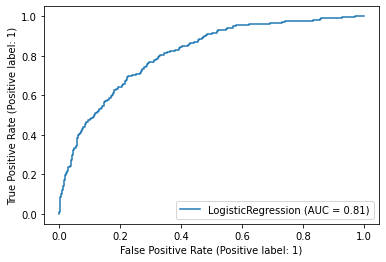

In [53]:
logistic_reg(x_train, y_train, x_valid,y_valid)

**KNeighbors**

Accuracy_score: 0.8172138420585625
AUC ROC score: 0.8170833821780851
F1_score: 0.5761316872427984
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       844
           1       0.69      0.49      0.58       283

    accuracy                           0.82      1127
   macro avg       0.77      0.71      0.73      1127
weighted avg       0.81      0.82      0.81      1127



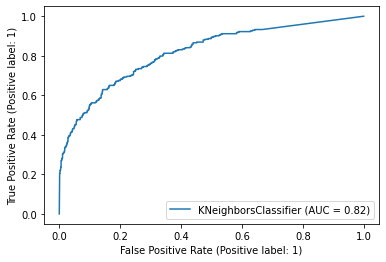

In [54]:
def KNeighbors(x_train, y_train, x_valid,y_valid):
    """
        KNeighbors Classifier Model
        Takes four parameters 
        Trains and displays results
    """
    knn = KNeighborsClassifier(n_neighbors=10,n_jobs=5,weights='distance',)
    knn.fit(x_train,y_train)
    results =display_predict(knn, x_valid,y_valid)
KNeighbors(x_train, y_train, x_valid,y_valid)

**svm_model**

In [55]:
def svm_model(x_train,y_train,x_valid,y_valid):
    """
        SVM Model
        Takes four parameters
        Scales the training set 
        Trains and displays results
    """
    scaler = StandardScaler()
    scaler.fit_transform(x_train)
    scaler.transform(x_test)
    svm_model = SVC(random_state=random,class_weight='balanced',probability=True)
    svm_model.fit(x_train, y_train)
    results =display_predict(svm_model, x_valid,y_valid)

Accuracy_score: 0.6637089618456078
AUC ROC score: 0.6928328002277561
F1_score: 0.46241134751773044
              precision    recall  f1-score   support

           0       0.83      0.69      0.76       844
           1       0.39      0.58      0.46       283

    accuracy                           0.66      1127
   macro avg       0.61      0.63      0.61      1127
weighted avg       0.72      0.66      0.68      1127



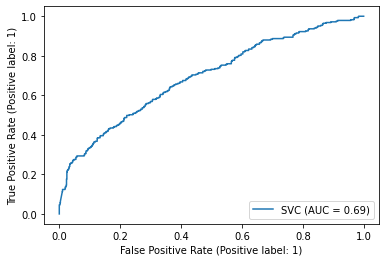

In [56]:
svm_model(x_train,y_train,x_valid,y_valid)

**Decision Tree model**

Accuracy_score: 0.8145519077196096
AUC ROC score: 0.7599224624453637
F1_score: 0.6377816291161179
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       844
           1       0.63      0.65      0.64       283

    accuracy                           0.81      1127
   macro avg       0.75      0.76      0.76      1127
weighted avg       0.82      0.81      0.82      1127



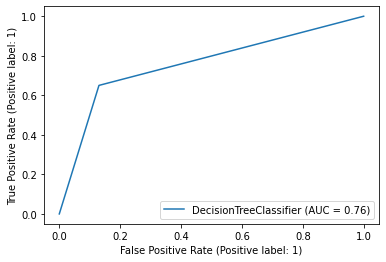

In [57]:
tree = DecisionTreeClassifier(random_state=random, class_weight='balanced')
tree.fit(x_train,y_train)
results = display_predict(tree, x_valid,y_valid)

**RandomForest**

Accuracy_score: 0.8535936113575865
AUC ROC score: 0.8661053706897994
F1_score: 0.6680080482897384
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       844
           1       0.78      0.59      0.67       283

    accuracy                           0.85      1127
   macro avg       0.82      0.76      0.79      1127
weighted avg       0.85      0.85      0.85      1127



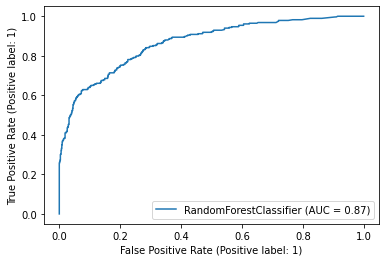

In [58]:
ran_forest = RandomForestClassifier(random_state=random,max_depth=16,n_estimators=200)
ran_forest.fit(x_train, y_train)
results = display_predict(ran_forest, x_valid,y_valid)

## Conclusion model train without hyperparameter
||Model|AUC_Score|
|-|---|---|
|1|RandomForest | 0.87|
|2|KNeighbors | 0.82|
|3|LogisticRegression | 0.81|
|4|DecisionTree | 0.76|
|5|SVM |0.69|


- We use 5 models without hyperparmeters and our best one in this stage is RandomForest with roc_auc score of **0.87**

## We are ready to Train our model hyperparameter

**RandomOverSampler**

Accuracy_score: 0.8376220053238687
AUC ROC score: 0.8652366318892033
F1_score: 0.6617375231053605
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       844
           1       0.69      0.63      0.66       283

    accuracy                           0.84      1127
   macro avg       0.79      0.77      0.78      1127
weighted avg       0.83      0.84      0.84      1127



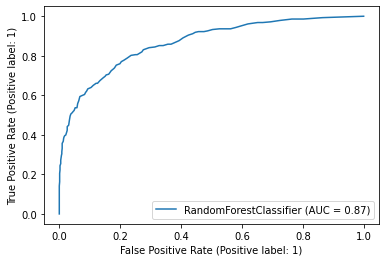

In [59]:
#RandomOverSampler on valid set
x_resampled,y_resampled = RandomOverSampler().fit_resample(x_train,y_train)
ran_forest = RandomForestClassifier(random_state=random)
ran_forest.fit(x_resampled,y_resampled)
results = display_predict(ran_forest, x_valid,y_valid)

**Logistic Regression**

In [60]:
def logistic_reg(x_train,y_train,x_valid,y_valid):
    """
        Logistic Regression Model
        Takes four parameters
        Scales the training set 
        GridSearchCV extracts the best params 
        Trains model using extarcted params and displays results
    """
    scaler = StandardScaler()
    scaler.fit_transform(x_resampled)
    scaler.transform(x_test)
    params = {'penalty': ['l2'], 'max_iter': [150,200]}
    grid_cv = GridSearchCV(LogisticRegression(solver='liblinear',random_state=random), 
                           param_grid=params,scoring='roc_auc',cv=10,refit=True)
    grid_cv.fit(x_resampled,y_resampled)
    best_params= grid_cv.best_params_
    lr = LogisticRegression(**best_params,solver='liblinear', class_weight='balanced').fit(x_resampled,y_resampled)
    results = display_predict(lr, x_valid,y_valid)

Accuracy_score: 0.7275953859804791
AUC ROC score: 0.8210733006213052
F1_score: 0.584573748308525
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       844
           1       0.47      0.76      0.58       283

    accuracy                           0.73      1127
   macro avg       0.69      0.74      0.69      1127
weighted avg       0.79      0.73      0.74      1127



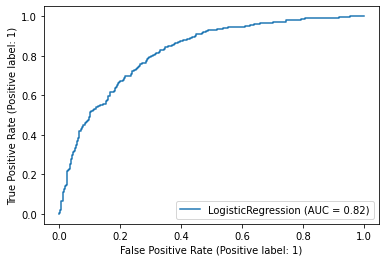

In [61]:
logistic_reg(x_train, y_train, x_valid,y_valid)

**Decision Tree model**

Accuracy_score: 0.8012422360248447
AUC ROC score: 0.783889186609281
F1_score: 0.6177474402730376
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       844
           1       0.60      0.64      0.62       283

    accuracy                           0.80      1127
   macro avg       0.74      0.75      0.74      1127
weighted avg       0.81      0.80      0.80      1127



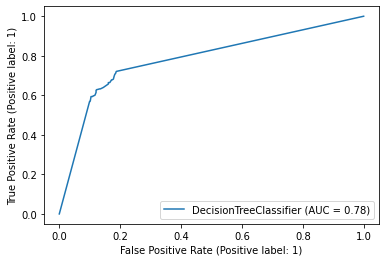

In [62]:
params = {
    "criterion":["gini", "entropy"],
    "max_depth":[2,4,8,16],
    "min_samples_split":[2],
    "min_samples_leaf":[2],
}
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=random),
                        param_grid=params,scoring='roc_auc', 
                        cv=10,refit=True)
g_cv.fit(x_resampled,y_resampled)
best_params = g_cv.best_params_
tree = DecisionTreeClassifier(**best_params,random_state=1)
tree.fit(x_resampled,y_resampled)
results = display_predict(tree,x_valid,y_valid)

**RandomForest**

In [63]:
def RandomForestClass(x_train, x_valid, y_train, y_valid):
    """ 
        RandomForestClassifier function.
        GridSearchCV searches and extract the best hyperparameter.
        Results used in training and computing rou_auc.
    """
    params = {
        "criterion":["gini", "entropy"],
        "max_depth":[2,4,8,16],
        "min_samples_split":[2,4,8, 16],
        "min_samples_leaf":[2,4,6]}
    g_cv = GridSearchCV(RandomForestClassifier(random_state=random,class_weight='balanced'),param_grid=params,scoring='roc_auc', 
                        cv=10,refit=True)
    g_cv.fit(x_resampled,y_resampled)
    best_params = g_cv.best_params_
    ran_forest = RandomForestClassifier(**best_params)
    ran_forest.fit(x_resampled,y_resampled)
    results = display_predict(ran_forest,x_test,y_test)

Accuracy_score: 0.8225691980127751
AUC ROC score: 0.8879460511822117
F1_score: 0.6827411167512689
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1030
           1       0.66      0.71      0.68       379

    accuracy                           0.82      1409
   macro avg       0.77      0.79      0.78      1409
weighted avg       0.83      0.82      0.82      1409



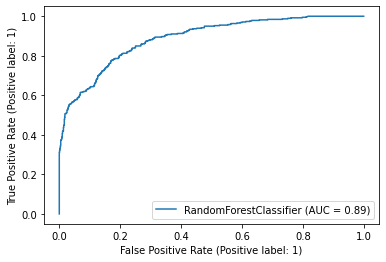

In [64]:
RandomForestClass(x_train, y_train, x_valid,y_valid)

**Stacking Model**

Accuracy_score: 0.8358473824312334
AUC ROC score: 0.8607840838678346
F1_score: 0.582392776523702
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       844
           1       0.81      0.46      0.58       283

    accuracy                           0.84      1127
   macro avg       0.82      0.71      0.74      1127
weighted avg       0.83      0.84      0.82      1127



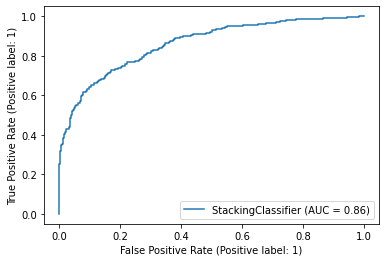

In [65]:
# Creating a stacking model(Randonforest, Kneighbors, GaussianNB and LogisticReg) to improve scores. 
estimators = [
    ('rf', RandomForestClassifier(random_state=random)),
    ('knn',KNeighborsClassifier(n_neighbors=10,weights='distance')),
    ('bayes', GaussianNB())]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(class_weight='balanced',
                                                                                   random_state=1,solver='liblinear'))

clf.fit(x_resampled,y_resampled)
results = display_predict(clf,x_valid,y_valid)

**XGBoost Model**

In [66]:
def xgb(x_train, x_valid, y_train, y_valid):
    """
        XGBoost function 
        Get the best params using GridSearchCV
        Train and display results on valid set.
    """
    params = {'max_depth': [4,8,16],'objective':['binary:logistic'],'learning_rate':[0.1]}
    g_cv = GridSearchCV(XGBClassifier(random_state=random),param_grid=params,scoring='roc_auc', cv=5,verbose=False)
    g_cv.fit(x_resampled,y_resampled)
    xgbr = XGBClassifier(**g_cv.best_params_)
    xgbr.fit(x_resampled,y_resampled,eval_set=[(x_valid,y_valid)],eval_metric='logloss')
    results = display_predict(xgbr,x_valid,y_valid)

[0]	validation_0-logloss:0.64385
[1]	validation_0-logloss:0.60473
[2]	validation_0-logloss:0.57178
[3]	validation_0-logloss:0.54345
[4]	validation_0-logloss:0.51973
[5]	validation_0-logloss:0.49619
[6]	validation_0-logloss:0.47736
[7]	validation_0-logloss:0.46135
[8]	validation_0-logloss:0.44886
[9]	validation_0-logloss:0.43803
[10]	validation_0-logloss:0.42832
[11]	validation_0-logloss:0.41792
[12]	validation_0-logloss:0.40858
[13]	validation_0-logloss:0.40020
[14]	validation_0-logloss:0.39444
[15]	validation_0-logloss:0.38831
[16]	validation_0-logloss:0.38382
[17]	validation_0-logloss:0.37861
[18]	validation_0-logloss:0.37554
[19]	validation_0-logloss:0.37321
[20]	validation_0-logloss:0.37115
[21]	validation_0-logloss:0.36932
[22]	validation_0-logloss:0.36791
[23]	validation_0-logloss:0.36552
[24]	validation_0-logloss:0.36389
[25]	validation_0-logloss:0.36164
[26]	validation_0-logloss:0.36081
[27]	validation_0-logloss:0.36026
[28]	validation_0-logloss:0.36019
[29]	validation_0-loglos

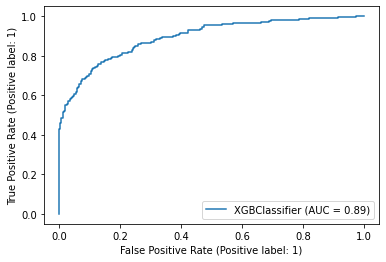

In [67]:
xgb(x_train, x_valid, y_train, y_valid)

**LightGMB Model**

In [68]:
def Lightgbmclass(x_train, x_valid, y_train, y_valid):
    """
       LightGMB function
       Extracts the best params using GridSearchCV
       Train and displays results on valid set.
    """
    params = {'learning_rate': [0.1],
              'max_depth': [6,8,16],}
    g_cv = GridSearchCV(LGBMClassifier(random_state=random),
                        scoring='roc_auc',
                        param_grid=params, cv=10)
    g_cv.fit(x_resampled,y_resampled)
    lgbm = LGBMClassifier(**g_cv.best_params_)
    lgbm.fit(x_resampled,y_resampled) 
    results = display_predict(lgbm,x_valid,y_valid)

Accuracy_score: 0.8349600709849158
AUC ROC score: 0.897555808617889
F1_score: 0.6910299003322259
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       844
           1       0.65      0.73      0.69       283

    accuracy                           0.83      1127
   macro avg       0.78      0.80      0.79      1127
weighted avg       0.84      0.83      0.84      1127



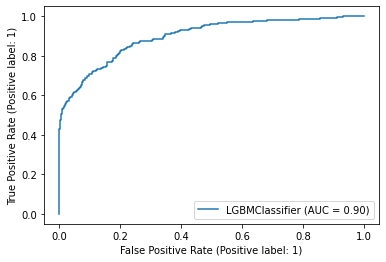

In [69]:
Lightgbmclass(x_train, x_valid, y_train, y_valid)

## Conclusion
||Model|AUC_Score|
|-|---|---|
|1|LightGBM | 0.90|
|2|XGBoost | 0.89|
|3|RandomForest | 0.89|
|4|StackingModel | 0.85|
|5|LogisticRegression | 0.82|
|6|DecisionTree | 0.79|

After hyperparameter our models we can see our best model is **LightGBM 0.90**

## Downsampling our LightGBM (the chosen best score Model) 

In [70]:
features_train_norm = x_train
features_train_norm['enddate'] = y_train
features_train_norm

,gender,seniorcitizen,partner,dependents,paperlessbilling,monthlycharges,totalcharges,multiplelines,onlinesecurity,onlinebackup,...,year,services,type_One year,type_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,internetservice_Fiber optic,internetservice_Uknown,enddate
617,1,1,0,0,1,102.85,6976.75,1,0,0,...,2014,4,1,0,1,0,0,1,0,0
6601,0,1,1,0,0,109.70,7898.45,1,0,1,...,2014,5,0,1,1,0,0,1,0,0
435,1,0,0,0,1,44.45,1183.80,0,0,0,...,2017,3,0,0,1,0,0,0,0,0
69,0,0,0,0,1,79.85,887.35,0,1,0,...,2019,2,0,0,0,0,1,1,0,0
1657,0,0,0,0,1,25.60,901.25,1,0,0,...,2017,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,0,1,0,0,1,60.05,1236.15,0,0,0,...,2018,2,0,0,0,0,0,0,0,1
2091,1,0,0,1,0,20.15,970.85,0,0,0,...,2015,0,0,1,1,0,0,0,1,0
3858,0,0,0,0,1,86.95,4138.90,0,1,1,...,2016,6,1,0,0,0,0,0,0,0
1085,1,1,0,0,1,74.30,940.35,0,0,0,...,2018,1,0,0,0,1,0,1,0,1


In [71]:
df_downsampled = resample(features_train_norm[y_train ==0],replace=False,n_samples=features_train_norm[y_train==1].shape[0],
                          random_state=random)
df_downsampled.shape

(1207, 26)

In [72]:
df_train_downsampled = pd.concat([df_downsampled,features_train_norm[y_train==1]])
df_train_downsampled.shape

(2414, 26)

In [73]:
assert df_train_downsampled.query('enddate==1')['enddate'].count()==df_train_downsampled.query('enddate==0')['enddate'].count()

In [74]:
def LGBMD(x_train, x_valid, y_train, y_valid):
    """
       LightGMB function
       Extracts the best params using GridSearchCV
       Train and displays results on valid set.
    """
    params = {'learning_rate': [0.1],
              'max_depth': [6,8,16],}
    g_cv = GridSearchCV(LGBMClassifier(random_state=random),
                        scoring='roc_auc',
                        param_grid=params, cv=10)
    g_cv.fit(x_resampled,y_resampled)
    lgbm = LGBMClassifier(**g_cv.best_params_)
    lgbm.fit(df_train_downsampled.drop(['enddate'],axis=1),df_train_downsampled['enddate']) 
    results = display_predict(lgbm,x_valid,y_valid)

Accuracy_score: 0.8243123336291038
AUC ROC score: 0.8995068075628422
F1_score: 0.7000000000000001
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       844
           1       0.61      0.82      0.70       283

    accuracy                           0.82      1127
   macro avg       0.77      0.82      0.79      1127
weighted avg       0.85      0.82      0.83      1127



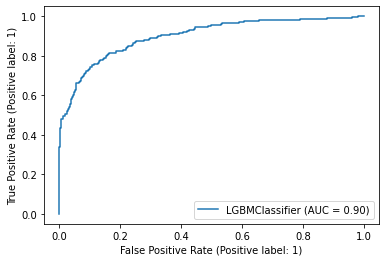

In [75]:
LGBMD(x_train, x_valid, y_train, y_valid)

<hr>

## Upsampling our LightGBM (the chosen best score Model) 

In [76]:
df_upsampled = resample(features_train_norm[y_train ==1],replace=True,n_samples=features_train_norm[y_train==0].shape[0],
                        random_state=random)
df_upsampled.shape

(3300, 26)

In [77]:
df_train_upsampled = pd.concat([df_upsampled,features_train_norm[y_train==0]])
df_train_upsampled.shape

(6600, 26)

In [78]:
assert df_train_upsampled.query('enddate==1')['enddate'].count()==df_train_upsampled.query('enddate==0')['enddate'].count()

In [79]:
def LGBMU(x_train, x_valid, y_train, y_valid):
    """
       LightGMB function
       Extracts the best params using GridSearchCV
       Train and displays results on test set.
    """
    params = {'learning_rate': [0.1],
              'max_depth': [6,8,16],}
    g_cv = GridSearchCV(LGBMClassifier(random_state=random),
                        scoring='roc_auc',
                        param_grid=params, cv=10)
    g_cv.fit(x_resampled,y_resampled)
    lgbm = LGBMClassifier(**g_cv.best_params_)
    lgbm.fit(df_train_upsampled.drop(['enddate'],axis=1),df_train_upsampled['enddate']) 
    results = display_predict(lgbm,x_valid,y_valid)

Accuracy_score: 0.8456078083407276
AUC ROC score: 0.89962403496726
F1_score: 0.7010309278350515
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       844
           1       0.68      0.72      0.70       283

    accuracy                           0.85      1127
   macro avg       0.79      0.80      0.80      1127
weighted avg       0.85      0.85      0.85      1127



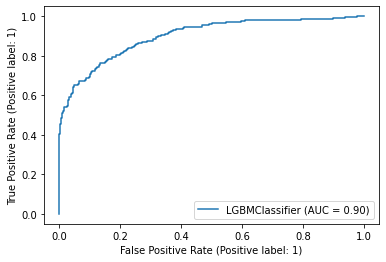

In [80]:
LGBMU(x_train, x_valid, y_train, y_valid)

## Conclusion
||Model|AUC_Score|
|-|---|---|
|1|LightGBM UpSampling | 0.90|
|2|LightGBM DownSampling | 0.90|

the LightGBM gave us great scores 0.90(UpSampling) and (DownSampling) to our dataset

<hr>

## Final Model

**Our Chosen model for the final test since the high score is LightGBM oversimple**

In [81]:
def Lightgbmclass(x_train, x_test, y_train, y_test):
    """
       LightGMB function
       Extracts the best params using GridSearchCV
       Train and displays results on test set.
    """
    params = {'learning_rate': [0.1],
              'max_depth': [6,8,16],}
    g_cv = GridSearchCV(LGBMClassifier(random_state=random),
                        scoring='roc_auc',
                        param_grid=params, cv=10)
    g_cv.fit(x_resampled,y_resampled)
    lgbm = LGBMClassifier(**g_cv.best_params_)
    lgbm.fit(x_resampled,y_resampled) 
    results = display_predict(lgbm,x_test,y_test)

Accuracy_score: 0.8587650816181689
AUC ROC score: 0.9128980198273434
F1_score: 0.7445442875481386
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1030
           1       0.72      0.77      0.74       379

    accuracy                           0.86      1409
   macro avg       0.82      0.83      0.82      1409
weighted avg       0.86      0.86      0.86      1409



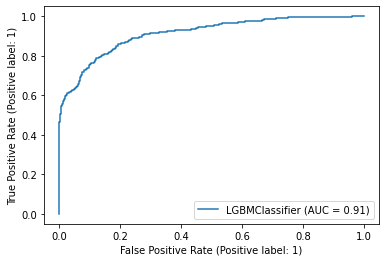

In [82]:
Lightgbmclass(x_train, x_test, y_train, y_test)

## Conclusion
||Model|AUC_Score|
|-|---|---|
|1|LightGBMOverSampler final test set| 0.91|

the model LightGBMOverSampler give us a great score of 0.91 in our final model test

# <a id="5"> Solution Report</a>

## Q: What steps of the plan were performed and what steps were skipped (explain why)?

A: As far as we can tell, we didn't skip any part of the original work plan, Vice versa we deep our learning to make know our customers habits and behavior in order to improve the services we offer so they prefer to stay with us and not move to other companies. this still long way to learn and make more customers happy which is hard work but possible if we really want to do our best to bring the plans everyone looking for, so for know everything we plan to do can mark as checked.

## Q:What difficulties did you encounter and how did you manage to solve them?

A: the moment we check our 4 dataset we know that going to be hard work to make it ready to process we notice that some columns isn't in the right dtype but the big first issue was the lower rows of the datasets `internet` & `phone` , that we know that as soon as we merge it with the other two we going to see missing values but this wasn't our surprise since after fix there missing rows was filled we found that `totalcharges` missing 11 values in the end of the dataset since the customers didn't pay there first bill yet so no total charge was made we fix it with the value of the `monthlycharges` , after that it was looking much better dataset that ready for the next stage 


## Q:What were some of the key steps to solving the task?

A: 
- Load our data and deep learn the first result
 
- Check the issues we know and the one we found on the way when we change thing (as say if it's shine it first check if deep to see if it's real is like that in the end)
 
- EDA to learn more deep our data and see our customers habits and behavior this will bring us more information 
 
- See that changes in our final df , Categorical features encode , drop columns we don't need , learn a bit more and go to the next step
 
- split our data Build our model, train it , hyperparameter tune and Upsampling / downsampling the best model from our training testing

- test the final model in test set and see the result we got


## Q:What is your final model and what quality score does it have?

A:our final model is LightGBMOverSampler which bring us a great result in all our test before the final and score of **0.91** in the last one.

Accuracy_score: 0.86
AUC ROC score: 0.91

# <a id="5">Final Conclusion</a> 

Our final project was to build higher score of AUC ROC as possible base on our data that export in feb 2020 and learning our customer from the steps that we make before our final model test. what we learn that most of our customer young people that may not have to much money or don't like to spend to much money one the telecom services , they always check us so they try to test us in first with min services and pay us month to month with electric check so they can leave at any time, others prefer to connect to more services pay a little bit more and use long term relationship with us when is almost 50:50 between the two genders.

from our 100% customers only ~26% leaves us which is overall say that we bring great services but there is always place to improve to lower this value even more.

We split our data into train , test and valid, We performed training on different modules include up and down simple on the chosen model **lightGBM** the one that bring the best score after hyperparameter of 0.90 and in our final test set of **0.91** which is the 6SP in the AUC ROC test.

Our recommend to telecom company your customers overall love your services if you keep listen to them and bring in front the best services in better prices even the younger that leave will prefer to stay. 